In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #this is a regression problem
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset using panda

gold_value = pd.read_csv("CombinedGoldDataCleaned.csv")
gold_value

,Month,Price,Export - Swiztzerland,Import - UK
0,1/1/1996,399.45,1.46,0.98
1,2/1/1996,404.76,1.46,0.98
2,3/1/1996,396.21,1.46,0.98
3,4/1/1996,392.85,1.46,0.98
4,5/1/1996,391.93,1.46,0.98
...,...,...,...,...
295,8/1/2020,1968.63,1.19,0.47
296,9/1/2020,1921.92,1.19,0.47
297,10/1/2020,1900.27,1.19,0.47
298,11/1/2020,1866.30,1.19,0.47


# Analzing the dataset

In [ ]:
gold_value.shape

(300, 4)

In [ ]:
gold_value.dtypes

Month                     object
Price                    float64
Export - Swiztzerland    float64
Import - UK              float64
dtype: object

In [ ]:
gold_value.isna().sum()

Month                    0
Price                    0
Export - Swiztzerland    0
Import - UK              0
dtype: int64

In [ ]:
gold_value.describe()

,Price,Export - Swiztzerland,Import - UK
count,300.000000,300.00000,300.000000
mean,870.185300,1.34960,0.536400
std,507.656772,0.11433,0.295136
min,256.080000,1.19000,0.080000
25%,355.537500,1.26000,0.360000
50%,873.675000,1.32000,0.490000
75%,1284.155000,1.44000,0.680000
max,1968.630000,1.58000,1.040000


In [ ]:
corr1 = gold_value.corr(method='pearson')
corr1

,Price,Export - Swiztzerland,Import - UK
Price,1.000000,-0.397430,-0.512037
Export - Swiztzerland,-0.397430,1.000000,0.728343
Import - UK,-0.512037,0.728343,1.000000


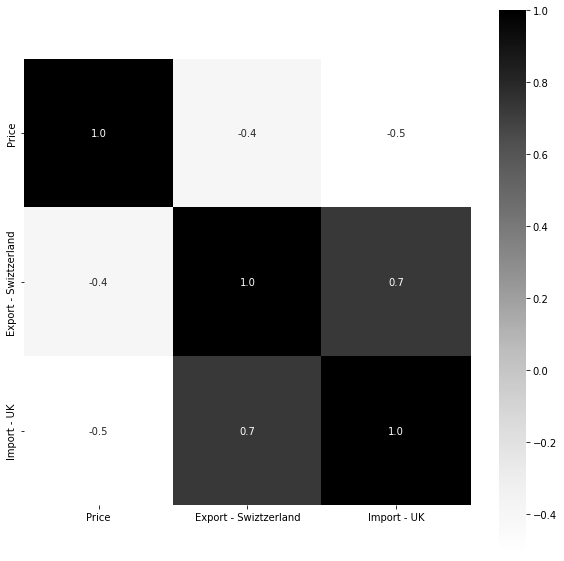

In [ ]:
#heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr1, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Greys');

In [ ]:
corr1['Price']

Price                    1.000000
Export - Swiztzerland   -0.397430
Import - UK             -0.512037
Name: Price, dtype: float64

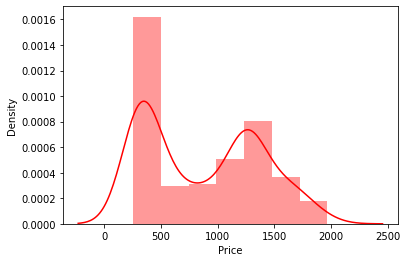

In [ ]:
sns.distplot(gold_value['Price'],color='red');

In [ ]:
x = gold_value.drop(['Month','Price'],axis=1)
x

,Export - Swiztzerland,Import - UK
0,1.46,0.98
1,1.46,0.98
2,1.46,0.98
3,1.46,0.98
4,1.46,0.98
...,...,...
295,1.19,0.47
296,1.19,0.47
297,1.19,0.47
298,1.19,0.47


In [ ]:
y = gold_value["Price"]
y

0       399.45
1       404.76
2       396.21
3       392.85
4       391.93
        ...   
295    1968.63
296    1921.92
297    1900.27
298    1866.30
299    1858.42
Name: Price, Length: 300, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(x_train,y_train)

0.9832677804942308

In [ ]:
gold_prediction = model.predict(x_test)
gold_prediction

array([ 409.76942289, 1259.92939486, 1591.76319093, 1259.92939486,
        286.34650676, 1259.92939486,  356.18436693,  356.18436693,
       1159.83376477,  374.57074827, 1383.25336095,  595.65329519,
        286.34650676, 1268.95153366,  450.38141274,  374.57074827,
        409.76942289,  698.70809476,  878.71120256,  374.57074827,
        286.34650676,  356.18436693, 1240.71497507, 1240.71497507,
       1449.7684612 ,  374.57074827, 1667.1581966 , 1667.1581966 ,
       1276.48025146, 1383.25336095,  595.65329519, 1449.7684612 ,
       1276.48025146,  984.36316151, 1240.71497507, 1240.71497507,
       1268.95153366, 1790.30210628,  310.11347489,  450.38141274,
        878.71120256,  275.66448368,  286.34650676,  356.18436693,
       1790.30210628, 1268.95153366,  595.65329519,  450.38141274,
        310.11347489, 1240.71497507, 1159.83376477, 1276.48025146,
        698.70809476, 1449.7684612 ,  878.71120256,  356.18436693,
        984.36316151, 1667.1581966 , 1159.83376477, 1591.76319

In [ ]:
error_score = metrics.r2_score(y_test,gold_prediction)
print("R squared : ",error_score)

R squared :  0.9759138370409766


In [ ]:
y_test1 = list(y_test)

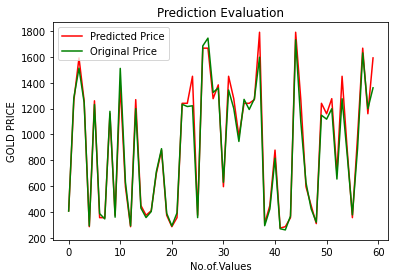

In [ ]:
plt.plot(gold_prediction,color="red",label="Predicted Price")
plt.plot(y_test1,color="green",label="Original Price")
plt.title("Prediction Evaluation")
plt.xlabel('No.of.Values')
plt.ylabel('GOLD PRICE')
plt.legend()
plt.show()

In [ ]:
model.score(x_test,y_test)

0.9759138370409766